<a href="https://colab.research.google.com/github/HarryPotter12/PractiseML/blob/master/Private_dataset_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import io, email
import numpy as np
from numpy import diag
from numpy import zeros
from numpy import linalg as LA
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib

In [0]:
data = pd.read_csv('/content/gdrive/My Drive/Datasets/messages.csv',header=None)

In [0]:
data.columns
data.head

<bound method NDFrame.head of                                                      0  ...                                                  5
0                        Re: Inter IIT Tech Meet 2K19!  ...  Subject:\r\nRe: Inter IIT Tech Meet 2K19!\r\nF...
1                    Debate: Vigilance Awareness week.  ...  Subject:\r\nDebate: Vigilance Awareness week.\...
2           New Email ID of Faculty-inchage Guesthouse  ...  Subject:\r\nNew Email ID of Faculty-inchage Gu...
3    Re: Course Feedback for July-Dec 2019 semester...  ...  Subject:\r\nRe: Course Feedback for July-Dec 2...
4                              T-Shirt Design Contest!  ...  Subject:\r\nT-Shirt Design Contest!\r\nFrom:\r...
..                                                 ...  ...                                                ...
419                           Faculty-In-Charge E-Cell  ...  Subject:\r\nFaculty-In-Charge E-Cell\r\nFrom:\...
420  New announcement: ""Your announced date for ex...  ...  Subject:\r\nNew annou

In [0]:
print(0)
print(data[3].iloc[1])
print(1)
print(data[3].iloc[2])
print(2)
print(data[3].iloc[3])
print(3)
print(data[3].iloc[4])
print(4)
print(data[3].iloc[5])
print(5)
print(data[3].iloc[6])

0
31/10/2019 21:45
1
31/10/2019 20:36
2
31/10/2019 17:25
3
31/10/2019 16:09
4
31/10/2019 15:51
5
31/10/2019 14:54


In [0]:
new_data = data[[3]].copy()
new_data.columns=['Date']
new_data['Date'] = pd.to_datetime(new_data['Date'], format="%d/%m/%Y %H:%M")

In [0]:
new_data['Value'] = 1

In [0]:
hourly_data = pd.DataFrame()
hourly_data = new_data.resample('H', on='Date').sum()

In [0]:
ds = hourly_data.index.to_series()
hourly_data['Month'] = ds.dt.month
hourly_data['MonthDay'] = ds.dt.day
hourly_data['Weekday'] = ds.dt.dayofweek
hourly_data['TimeOfDay'] = ds.dt.hour

In [0]:
for i in hourly_data.index:
    if (hourly_data['TimeOfDay'][i] >= 5) & int(hourly_data['TimeOfDay'][i] <= 11):
        hourly_data['TimeOfDay'][i] = 'Morning' 
    elif (hourly_data['TimeOfDay'][i] >= 12) & (hourly_data['TimeOfDay'][i] <= 16):
        hourly_data['TimeOfDay'][i] = 'Afternoon'
    elif (hourly_data['TimeOfDay'][i] >= 17) & (hourly_data['TimeOfDay'][i] <= 21):
        hourly_data['TimeOfDay'][i] = 'Evening'
    else:
        hourly_data['TimeOfDay'][i] = 'Night'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/pytho

In [0]:
from sklearn.model_selection import train_test_split
from patsy import dmatrices

In [0]:
mask = np.random.rand(len(hourly_data)) < 0.7
df_train = hourly_data[mask]
df_test = hourly_data[~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))

Training data set length=524
Testing data set length=219


In [0]:
import statsmodels.api as sm

In [0]:
from patsy import dmatrices

In [0]:
expr = """Value ~ C(Month)  + C(MonthDay) + C(Weekday) + C(TimeOfDay)"""

In [0]:
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

In [0]:
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

In [0]:
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Value   No. Observations:                  524
Model:                            GLM   Df Residuals:                      490
Model Family:                 Poisson   Df Model:                           33
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.3744e+14
Date:                Sun, 17 Nov 2019   Deviance:                   2.7488e+14
Time:                        14:37:23   Pearson chi2:                 1.37e+14
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [0]:
poisson_predictions = poisson_training_results.get_prediction(X_test)
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

                         mean   mean_se  mean_ci_lower  mean_ci_upper
Date                                                                 
2019-10-01 05:00:00  1.165489  0.239055       0.779681       1.742206
2019-10-01 09:00:00  1.165489  0.239055       0.779681       1.742206
2019-10-01 13:00:00  2.220367  0.455422       1.485366       3.319066
2019-10-01 18:00:00  1.550066  0.317936       1.036953       2.317081
2019-10-01 20:00:00  1.550066  0.317936       1.036953       2.317081
...                       ...       ...            ...            ...
2019-10-31 03:00:00  0.292219  0.097406       0.152046       0.561620
2019-10-31 07:00:00  0.420223  0.140074       0.218648       0.807632
2019-10-31 08:00:00  0.420223  0.140074       0.218648       0.807632
2019-10-31 14:00:00  0.800564  0.266855       0.416545       1.538615
2019-10-31 21:00:00  0.558884  0.186295       0.290795       1.074126

[219 rows x 4 columns]


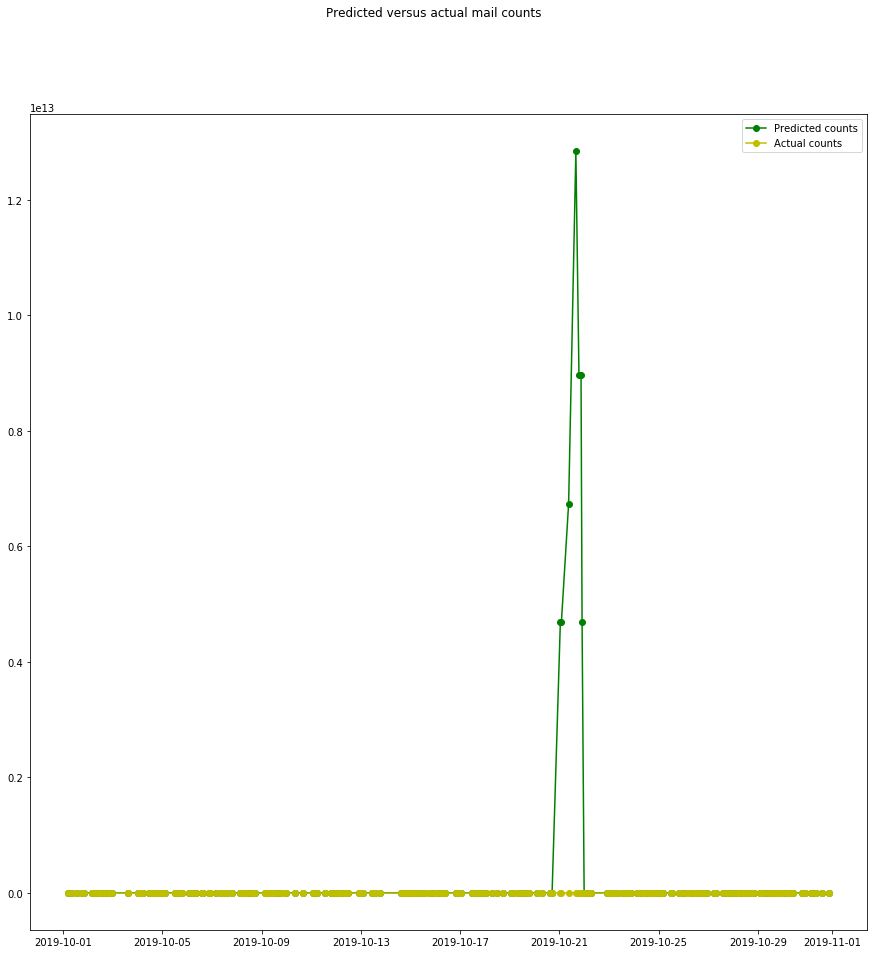

In [0]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['Value']

plt.rcParams["figure.figsize"] = (15, 15)
fig = plt.figure()
fig.suptitle('Predicted versus actual mail counts ')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'yo-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

<Figure size 360x360 with 0 Axes>

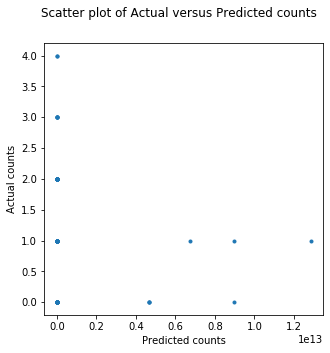

In [0]:
plt.rcParams["figure.figsize"] = (5, 5)
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()